In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') # iris
pca_painter = PaintPCA(alldata)

Variance explained by first 2 principal components: [0.75812151 0.24187849]


[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[-1 -1]
[ 1 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[0 1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[0 1]
[0 1]
[ 1 -1]
[0 1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[0 1]
[ 1 -1]
[0 1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[0 1]
[0 1]
[ 0 -1]
[0 1]
[ 1 -1]
[0 1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 0 -1]
[0 1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[0 1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[0 1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[-1  1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[0 1]
[0 1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 0 -1]
[ 1 -1]
[ 1 -1]
[0 1]
[ 1 -1]
[ 1 -1]
[ 0 -1]


[1 5]
[0 3]
[0 3]
[0 3]
[0 4]
[0 3]
[0 2]
[1 5]
[ 2 -1]
[0 4]
[0 2]
[0 3]
[1 5]
[1 5]
[ 2 -1]
[ 3 -1]
[ 3 -1]
[1 5]
[1 5]
[0 3]
[0 3]
[0 3]
[ 1 -1]
[0 3]
[1 5]
[0 3]
[1 5]
[0 2]
[1 5]
[0 4]
[0 3]
[ 2 -1]
[1 5]
[0 3]
[0 3]
[3 0]
[0 3]
[ 2 -1]
[ 5 -1]
[0 2]
[0 2]
[0 3]
[0 3]
[0 3]
[1 5]
[1 5]
[0 2]
[1 5]
[1 5]
[0 3]
[0 3]
[1 5]
[1 5]
[0 4]
[0 3]
[1 5]
[0 3]
[0 3]
[1 5]
[1 5]
[-1  3]
[0 4]
[1 5]
[0 2]
[0 2]
[ 2 -1]
[0 3]
[0 3]
[0 2]
[0 3]
[-1  4]
[-1  2]
[0 2]
[0 2]
[0 2]
[0 3]
[0 2]
[1 5]
[ 2 -1]
[1 5]
[0 2]
[ 3 -1]
[1 5]
[0 2]
[1 5]
[0 3]
Category 4 is too small
Category 5 is too small
[1 5]
[0 3]
[0 3]
[0 2]
[0 4]
[ 2 -1]
[-1  4]
[1 5]
[0 3]
[-1  3]
[0 2]
[1 5]
[0 3]
[0 2]
[0 3]
[0 2]
[0 2]
[-1  3]
[3 0]
[1 5]
[1 5]
[0 2]
[0 2]
[0 3]
[1 5]
[0 3]
[0 3]
[2 6]
[1 5]
[0 3]
[0 6]
[0 6]
[1 4]
[0 2]
[1 5]
[0 2]
[0 7]
[0 2]
[1 5]
[0 6]
[0 3]
[1 5]
[0 3]
[-1  2]
[0 3]
[ 2 -1]
[0 7]
[1 5]
[1 5]
[0 7]
[0 4]
[0 2]
[0 7]
[0 6]
[1 5]
[-1  4]
[1 5]
[ 1 -1]
[1 5]
[1 5]
[1 5]
[ 3 -1]
[0 2]
[1 5]
[1 5]


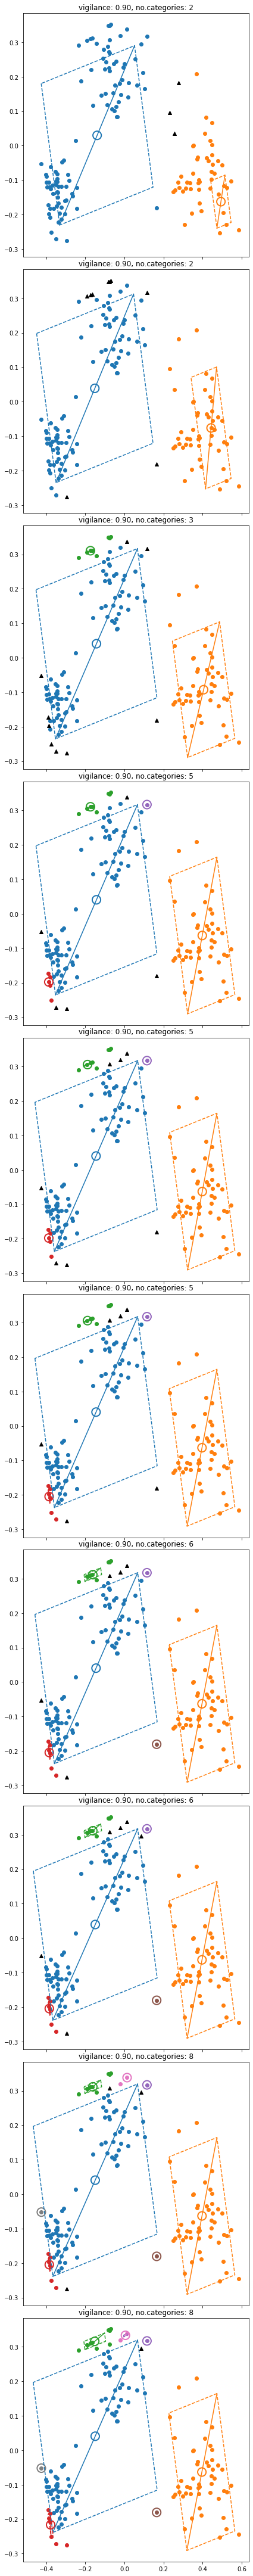

In [3]:
np.random.shuffle(alldata)

no_epoch = 10
fig, axs = plt.subplots(no_epoch, 1,
                        figsize = (6, 6 * no_epoch), sharex=True, sharey=True)
fig.tight_layout()

# plot true data
#pca_painter.scatter(axs[0], label_true)
#axs[0].set_title("true data")

# init
rho=0.9
net = FuzzyART(alpha=0.5)

for ax, data in zip(axs, alldata.reshape(no_epoch, -1, 2)):    
    
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
# save fig
simname = 'var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
#savefigure_datetime(fig, simname, dirname)



In [4]:
net.w

array([[2.91294656e-01, 1.58655648e-02, 2.61815629e-01, 4.36139977e-01],
       [8.63114610e-02, 6.72485733e-01, 5.04341324e-01, 7.53349405e-02],
       [7.71280354e-01, 2.95127488e-01, 2.04179913e-01, 5.96434369e-01],
       [2.82473816e-01, 4.42473687e-03, 6.51695959e-01, 9.84535829e-01],
       [7.24819626e-01, 6.10068053e-01, 2.75180374e-01, 3.89931947e-01],
       [2.28689265e-01, 5.46780742e-01, 7.71310735e-01, 4.53219258e-01],
       [7.62892183e-01, 4.97123892e-01, 2.31856881e-01, 4.84351675e-01],
       [4.86226138e-01, 4.46976897e-04, 5.13773862e-01, 9.99553023e-01]])

In [5]:
label_predall[-5:]

array([[ 3., -1.],
       [ 1.,  5.],
       [ 0.,  2.],
       [ 1.,  5.],
       [ 0.,  3.]])

In [6]:
label_pred[-5:]

array([3, 1, 0, 1, 0])